In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
from secrets import secrets

In [2]:
api_key = secrets.get('YT_API_KEY')
channel_ids = [
               'UCj22tfcQrWG7EMEKS0qLeEg', # Carryminati
               'UC5c9VlYTSvBSCaoMu_GI6gQ', # Total Gaming
               'UC7eHZXheF8nVOfwB2PEslMw', # Ashish Chanchlani Vines
               'UCqwUrj10mAEsqezcItqvwEw', # BB ki Vines
               'UCt4atlExw8aj3Bm79nv1fig', # Round2hell 
               'UC_vcKmg67vjMP7ciLnSxSHQ', # Amit Bhadana
               'UCX8pnu3DYUnx8qy8V_c6oHg', # Techno Gamerz
               'UCOhHO2ICt0ti9KAh-QHvttQ', # Technical Guruji
               'UCBqFKDipsnzvJdt6UT0lMIg', # Sandeep Maheshwari
               'UCSiDGb0MnHFGjs4E2WKvShw'  # Mr Indian Hacker
              ]

youtube = build('youtube', 'v3', developerKey = api_key)

## Function to fetch Channel Statistics

In [3]:
def get_channel_stats(youtube, channel_ids):
    request = youtube.channels().list(part = 'snippet,contentDetails,statistics', id = ','.join(channel_ids))
    response = request.execute() 
    
    all_data = []
    for i in range(len(response['items'])):
        data = dict( Channel_Name = response['items'][i]['snippet']['title'],
                     Total_Subscribers = response['items'][i]['statistics']['subscriberCount'],
                     Total_Views = response['items'][i]['statistics']['viewCount'],
                     Total_Videos = response['items'][i]['statistics']['videoCount'],
                     Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                   )
        all_data.append(data)
    
    return all_data
#     return response


In [4]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

[{'Channel_Name': 'Amit Bhadana',
  'Total_Subscribers': '23900000',
  'Total_Views': '2189218790',
  'Total_Videos': '91',
  'Playlist_id': 'UU_vcKmg67vjMP7ciLnSxSHQ'},
 {'Channel_Name': 'Round2hell',
  'Total_Subscribers': '25400000',
  'Total_Views': '2692086229',
  'Total_Videos': '67',
  'Playlist_id': 'UUt4atlExw8aj3Bm79nv1fig'},
 {'Channel_Name': 'BB Ki Vines',
  'Total_Subscribers': '25200000',
  'Total_Views': '4200837661',
  'Total_Videos': '183',
  'Playlist_id': 'UUqwUrj10mAEsqezcItqvwEw'},
 {'Channel_Name': 'CarryMinati',
  'Total_Subscribers': '35100000',
  'Total_Views': '2827741918',
  'Total_Videos': '178',
  'Playlist_id': 'UUj22tfcQrWG7EMEKS0qLeEg'},
 {'Channel_Name': 'Total Gaming',
  'Total_Subscribers': '31700000',
  'Total_Views': '5611570427',
  'Total_Videos': '1782',
  'Playlist_id': 'UU5c9VlYTSvBSCaoMu_GI6gQ'},
 {'Channel_Name': 'Techno Gamerz',
  'Total_Subscribers': '25100000',
  'Total_Views': '6022349746',
  'Total_Videos': '788',
  'Playlist_id': 'UUX8pn

In [5]:
channels_data = pd.DataFrame(channel_statistics)
channels_data

,Channel_Name,Total_Subscribers,Total_Views,Total_Videos,Playlist_id
0,Amit Bhadana,23900000,2189218790,91,UU_vcKmg67vjMP7ciLnSxSHQ
1,Round2hell,25400000,2692086229,67,UUt4atlExw8aj3Bm79nv1fig
2,BB Ki Vines,25200000,4200837661,183,UUqwUrj10mAEsqezcItqvwEw
3,CarryMinati,35100000,2827741918,178,UUj22tfcQrWG7EMEKS0qLeEg
4,Total Gaming,31700000,5611570427,1782,UU5c9VlYTSvBSCaoMu_GI6gQ
5,Techno Gamerz,25100000,6022349746,788,UUX8pnu3DYUnx8qy8V_c6oHg
6,MR. INDIAN HACKER,24200000,4102231363,787,UUSiDGb0MnHFGjs4E2WKvShw
7,ashish chanchlani vines,27800000,3847742683,147,UU7eHZXheF8nVOfwB2PEslMw
8,Sandeep Maheshwari,22300000,1614770155,469,UUBqFKDipsnzvJdt6UT0lMIg
9,Technical Guruji,22000000,2962410268,4349,UUOhHO2ICt0ti9KAh-QHvttQ


In [6]:
channels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_Name       10 non-null     object
 1   Total_Subscribers  10 non-null     object
 2   Total_Views        10 non-null     object
 3   Total_Videos       10 non-null     object
 4   Playlist_id        10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [7]:
channels_data['Total_Subscribers'] = pd.to_numeric(channels_data['Total_Subscribers'])
channels_data['Total_Views'] = pd.to_numeric(channels_data['Total_Views'])
channels_data['Total_Videos'] = pd.to_numeric(channels_data['Total_Videos'])

In [8]:
channels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_Name       10 non-null     object
 1   Total_Subscribers  10 non-null     int64 
 2   Total_Views        10 non-null     int64 
 3   Total_Videos       10 non-null     int64 
 4   Playlist_id        10 non-null     object
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


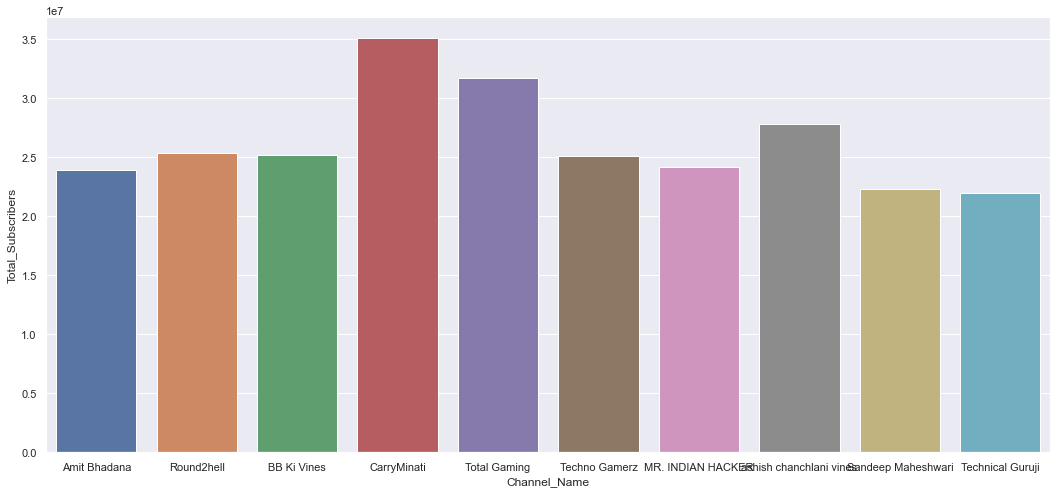

In [9]:
sns.set( rc = { 'figure.figsize' : (18,8) } )
subs_comp = sns.barplot(x = 'Channel_Name', y = 'Total_Subscribers', data = channels_data)

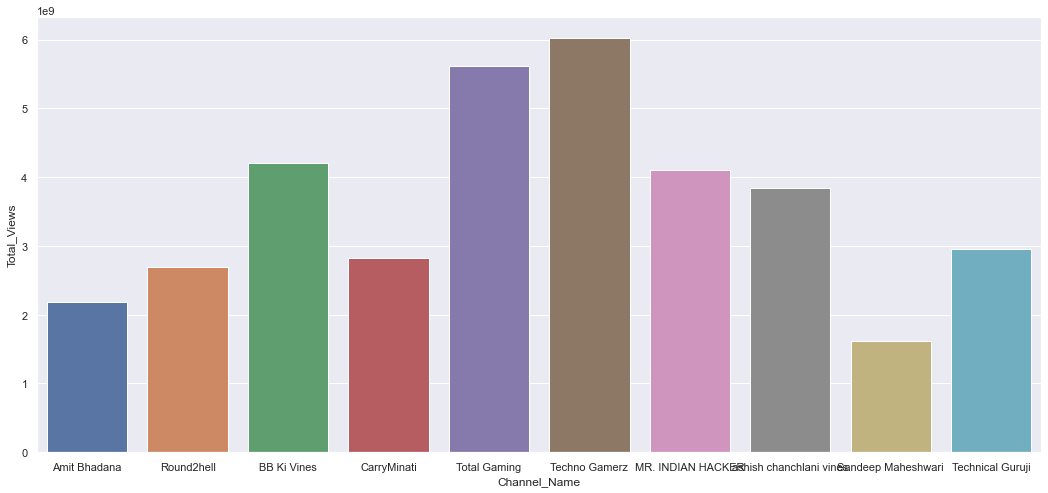

In [10]:
views_comp = subs_comp = sns.barplot(x = 'Channel_Name', y = 'Total_Views', data = channels_data)

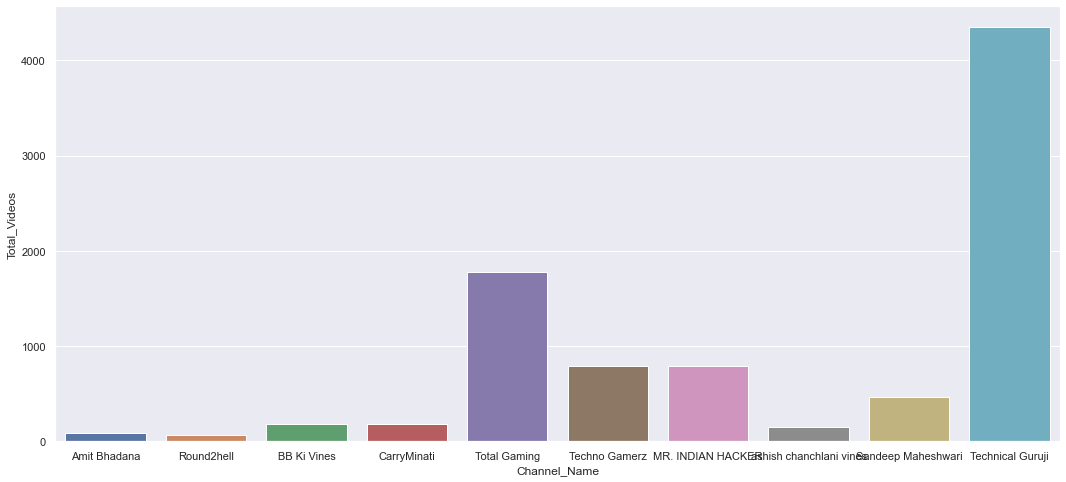

In [11]:
videos_comp = sns.barplot(x = 'Channel_Name', y = 'Total_Videos', data = channels_data)

In [12]:
channels_data

,Channel_Name,Total_Subscribers,Total_Views,Total_Videos,Playlist_id
0,Amit Bhadana,23900000,2189218790,91,UU_vcKmg67vjMP7ciLnSxSHQ
1,Round2hell,25400000,2692086229,67,UUt4atlExw8aj3Bm79nv1fig
2,BB Ki Vines,25200000,4200837661,183,UUqwUrj10mAEsqezcItqvwEw
3,CarryMinati,35100000,2827741918,178,UUj22tfcQrWG7EMEKS0qLeEg
4,Total Gaming,31700000,5611570427,1782,UU5c9VlYTSvBSCaoMu_GI6gQ
5,Techno Gamerz,25100000,6022349746,788,UUX8pnu3DYUnx8qy8V_c6oHg
6,MR. INDIAN HACKER,24200000,4102231363,787,UUSiDGb0MnHFGjs4E2WKvShw
7,ashish chanchlani vines,27800000,3847742683,147,UU7eHZXheF8nVOfwB2PEslMw
8,Sandeep Maheshwari,22300000,1614770155,469,UUBqFKDipsnzvJdt6UT0lMIg
9,Technical Guruji,22000000,2962410268,4349,UUOhHO2ICt0ti9KAh-QHvttQ


In [13]:
playlist_id = channels_data.loc[channels_data['Channel_Name'] == 'CarryMinati', 'Playlist_id'].iloc[0]
playlist_id

'UUj22tfcQrWG7EMEKS0qLeEg'

## Function to Fetch Video IDs

In [14]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list( part = 'contentDetails', playlistId = playlist_id, maxResults = 50 )
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_id = response['items'][i]['contentDetails']['videoId']
        video_ids.append(video_id)
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        
        if next_page_token is None:
            more_pages = False
        
        else:
            request = youtube.playlistItems().list( part = 'contentDetails', playlistId = playlist_id, maxResults = 50, pageToken = next_page_token )
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_id = response['items'][i]['contentDetails']['videoId']
                video_ids.append(video_id)
            
            next_page_token = response.get('nextPageToken')

    return video_ids
#     return response


In [15]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['G6qLfTA2PFw',
 '0jUj3rfO7eM',
 'xLjMzNKUXKs',
 'Q9eh308Mstc',
 'ZAvKl1RRVh8',
 'd7sewLjzNs0',
 '7mFvyrNHZRY',
 'W2uUlW8PLOY',
 'abhuAYtmk58',
 'q2QvA3wwAe0',
 'zzwRbKI2pn4',
 'WUdo9lzpaas',
 'YXlRTFhfE_4',
 'WNWZNyXSvW0',
 'GOFQN8otiYs',
 'WcjMwfwfojQ',
 '9DAKh_XCk6g',
 '0Cyvhz1GmRI',
 'ARKlB5Roq14',
 'SE7Yx_b0bE8',
 'zIysUw3B3Gs',
 '7x9OmRGtF4E',
 'bHLJjgzCDzU',
 'U8qEsK3liMI',
 'uyFxLg_LYU0',
 '0MpVfUK9uho',
 'pJZTizXITW0',
 '_575JFx6Iq4',
 '4DOHUzTdS_8',
 '2QBsDH72MoM',
 'XvyKSWfxM_w',
 'n2VL8tGZSsA',
 '10y9yefd_xY',
 '1x2K9Rie2Vg',
 '6LjPVsA_INg',
 'wrmEZFSeOJo',
 'qAt4__lG0es',
 'fUTyUjYldqg',
 'nCNXaH67B-w',
 'Hm32viIpFqk',
 'iP-wzsu8pKw',
 'rqNHHY1Ni_c',
 'L1AuR4NORTk',
 'x4gQHzfLKsg',
 'j8LTjzih2sQ',
 '2xrcas1YDkU',
 'vWI6cixIDsg',
 '2ygclkWHo8w',
 'X5_Pj-ooYgA',
 'uASM7aFcQJ8',
 'lZC45nxzH7Q',
 'Xl1jzveTsrk',
 'vCDj8LDKbRE',
 'DCqty4-VjZc',
 't7VkeCAAC_0',
 'xRaWi15qJks',
 '2pLwfRxFsOk',
 '8irzPQlBpCE',
 'X8crHN5ys_8',
 'IfGHHgtZOF8',
 '235T1AZ4LVk',
 '2T97za0Ifek',
 'eaqda5

## Function to fetch Video Details

In [16]:
def get_video_details(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list( part ='snippet,statistics', id = ','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for i in range(len(response['items'])):
            video_stats = dict( 
                                Title = response['items'][i]['snippet']['title'],
                                Published_date = response['items'][i]['snippet']['publishedAt'],
                                Views = response['items'][i]['statistics']['viewCount'],
                                Likes = response['items'][i]['statistics']['likeCount']
                              )
            all_video_stats.append(video_stats)
    
    return all_video_stats
#     return response

In [17]:
video_details = get_video_details(youtube, video_ids)
video_details

[{'Title': 'GETTING MARRIED? QNA 2022 | CARRYMINATI',
  'Published_date': '2022-02-16T08:52:06Z',
  'Views': '14530703',
  'Likes': '2341465'},
 {'Title': 'THARA BHAiiiii | CARRYMINATI',
  'Published_date': '2022-01-19T11:34:42Z',
  'Views': '38940764',
  'Likes': '5804851'},
 {'Title': 'METUBE SPACE | CARRYMINATI',
  'Published_date': '2021-12-03T14:16:02Z',
  'Views': '17657867',
  'Likes': '2403415'},
 {'Title': 'CANCEL CULTURE ORGANIZATION | CARRYMINATI',
  'Published_date': '2021-09-05T14:20:46Z',
  'Views': '21342480',
  'Likes': '2135055'},
 {'Title': 'SOCIAL MEDIA CULTURE | CARRYMINATI',
  'Published_date': '2021-09-05T07:41:43Z',
  'Views': '20665227',
  'Likes': '2796970'},
 {'Title': 'THE LAND OF BIGG BOSS | CARRYMINATI',
  'Published_date': '2021-05-23T15:50:44Z',
  'Views': '47588132',
  'Likes': '4505319'},
 {'Title': 'VARDAAN - CARRYMINATI X Wily Frenzy',
  'Published_date': '2021-01-17T15:17:28Z',
  'Views': '59496349',
  'Likes': '6207144'},
 {'Title': 'MASSAGE PARADIS

In [18]:
videos_data = pd.DataFrame(video_details)
videos_data

,Title,Published_date,Views,Likes
0,GETTING MARRIED? QNA 2022 | CARRYMINATI,2022-02-16T08:52:06Z,14530703,2341465
1,THARA BHAiiiii | CARRYMINATI,2022-01-19T11:34:42Z,38940764,5804851
2,METUBE SPACE | CARRYMINATI,2021-12-03T14:16:02Z,17657867,2403415
3,CANCEL CULTURE ORGANIZATION | CARRYMINATI,2021-09-05T14:20:46Z,21342480,2135055
4,SOCIAL MEDIA CULTURE | CARRYMINATI,2021-09-05T07:41:43Z,20665227,2796970
...,...,...,...,...
173,India's Adult Film of The Year !,2016-02-17T13:33:57Z,11800502,359976
174,KRK India's Best Film ACTOR/PRODUCER/CRITIC !,2016-02-14T13:58:58Z,5275205,348907
175,Indians That Torrent,2016-02-09T14:02:52Z,2829006,173602
176,INDIA CS:GO,2016-02-06T14:09:08Z,3100413,172936


In [19]:
videos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           178 non-null    object
 1   Published_date  178 non-null    object
 2   Views           178 non-null    object
 3   Likes           178 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [20]:
videos_data['Published_date'] = pd.to_datetime(videos_data['Published_date']).dt.date
videos_data['Views'] = pd.to_numeric(videos_data['Views'])
videos_data['Likes'] = pd.to_numeric(videos_data['Likes'])

In [21]:
videos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           178 non-null    object
 1   Published_date  178 non-null    object
 2   Views           178 non-null    int64 
 3   Likes           178 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.7+ KB


In [22]:
videos_data

,Title,Published_date,Views,Likes
0,GETTING MARRIED? QNA 2022 | CARRYMINATI,2022-02-16,14530703,2341465
1,THARA BHAiiiii | CARRYMINATI,2022-01-19,38940764,5804851
2,METUBE SPACE | CARRYMINATI,2021-12-03,17657867,2403415
3,CANCEL CULTURE ORGANIZATION | CARRYMINATI,2021-09-05,21342480,2135055
4,SOCIAL MEDIA CULTURE | CARRYMINATI,2021-09-05,20665227,2796970
...,...,...,...,...
173,India's Adult Film of The Year !,2016-02-17,11800502,359976
174,KRK India's Best Film ACTOR/PRODUCER/CRITIC !,2016-02-14,5275205,348907
175,Indians That Torrent,2016-02-09,2829006,173602
176,INDIA CS:GO,2016-02-06,3100413,172936


In [23]:
top_10_videos = videos_data.sort_values( by = 'Views', ascending = False).head(10)
top_10_videos

,Title,Published_date,Views,Likes
10,YALGAAR - CARRYMINATI X Wily Frenzy,2020-06-05,289547088,16600951
12,STOP MAKING ASSUMPTIONS | YOUTUBE VS TIK TOK: ...,2020-05-17,75857164,9011368
24,TIKTOK EVOLUTION 2019 | CARRYMINATI,2019-07-05,67875159,5393454
16,BIG BOSS BIG BOSS BIG BOSS PART 2 | CARRYMINATI,2020-02-12,61597740,4919186
27,NO MORE SINGLE: VALENTINE SPECIAL FEAT ROCKY,2019-02-11,60375303,3898560
6,VARDAAN - CARRYMINATI X Wily Frenzy,2021-01-17,59496349,6207144
29,Bye Pewdiepie | Carryminati,2019-01-01,57790476,3535239
14,FILM THE FLARE,2020-04-10,50852880,3723098
5,THE LAND OF BIGG BOSS | CARRYMINATI,2021-05-23,47588132,4505319
30,WEDDING OF THE YEAR (I'M INVITED!),2018-12-05,47113323,3367676


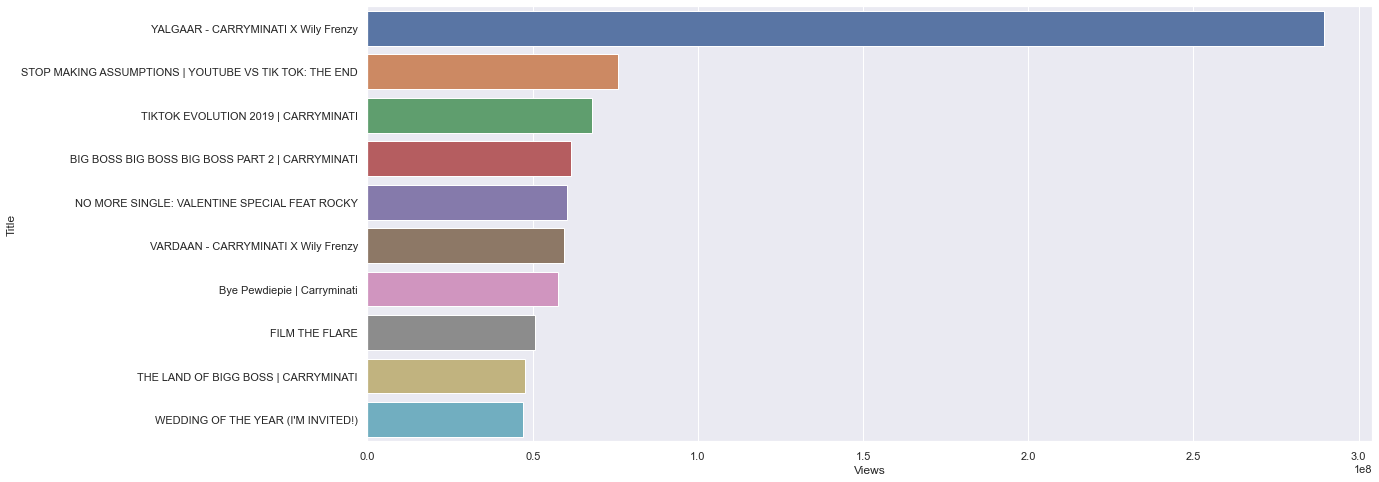

In [24]:
top_videos_comp = sns.barplot(x = 'Views', y = 'Title', data = top_10_videos)

In [25]:
bottom_10_videos = videos_data.sort_values( by = 'Views', ascending = True).head(10)
bottom_10_videos

,Title,Published_date,Views,Likes
159,Ear Bleeding Prank in India,2016-03-28,786015,57783
164,This is A QnA Video,2016-03-16,1060879,85092
103,INDIAN WOMEN GETTING HIGH,2016-09-06,1087917,89255
160,Dobby vs Indian Guy (Gone Bollywood),2016-03-26,1422721,103648
152,SAVE HUMANITITIES,2016-04-11,1482900,98422
166,Make your Eyes Bleed,2016-03-12,1536302,93222
158,When Indian Sings English Songs,2016-03-30,1648017,88691
163,Swaggiest RapStar in Mumbai (Gone Sexual),2016-03-18,1669172,91573
162,Lets Make Girls Weird Prank,2016-03-22,1723667,120405
149,GUJJAR SWEG RAP,2016-04-24,1821332,102717


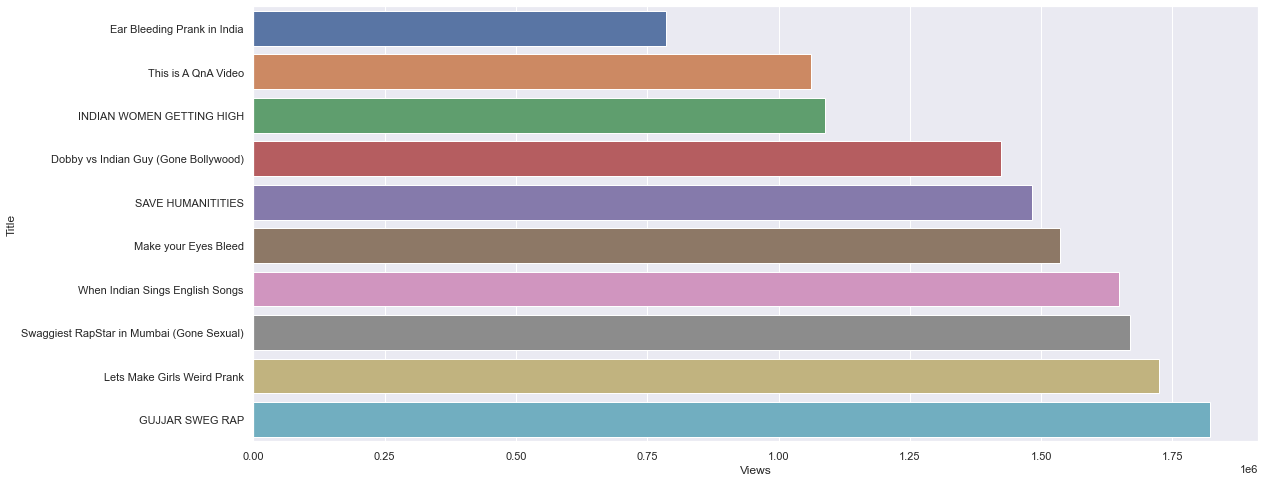

In [26]:
bottom_videos_comp = sns.barplot(x = 'Views', y = 'Title', data = bottom_10_videos)

In [27]:
most_liked_videos = videos_data.sort_values( by = 'Likes', ascending = False).head(10)
most_liked_videos

,Title,Published_date,Views,Likes
10,YALGAAR - CARRYMINATI X Wily Frenzy,2020-06-05,289547088,16600951
12,STOP MAKING ASSUMPTIONS | YOUTUBE VS TIK TOK: ...,2020-05-17,75857164,9011368
6,VARDAAN - CARRYMINATI X Wily Frenzy,2021-01-17,59496349,6207144
9,THE ART OF BAD WORDS,2020-07-10,44942669,6171542
1,THARA BHAiiiii | CARRYMINATI,2022-01-19,38940764,5804851
8,IDLES OF INDIA: GONE RIGHT,2020-09-04,42208356,5410630
24,TIKTOK EVOLUTION 2019 | CARRYMINATI,2019-07-05,67875159,5393454
7,MASSAGE PARADISE,2020-11-20,37914023,5044639
11,YALGAAR....COMING SOON,2020-05-24,38402434,4949048
16,BIG BOSS BIG BOSS BIG BOSS PART 2 | CARRYMINATI,2020-02-12,61597740,4919186


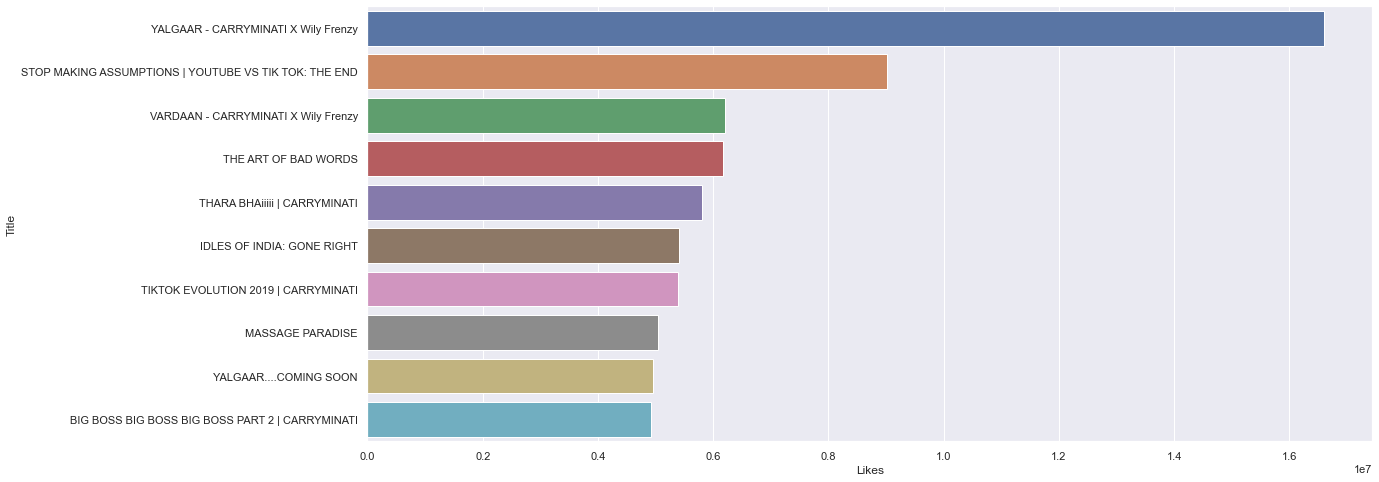

In [28]:
most_liked_videos_comp = sns.barplot(x = 'Likes', y = 'Title', data = most_liked_videos)

In [29]:
videos_data

,Title,Published_date,Views,Likes
0,GETTING MARRIED? QNA 2022 | CARRYMINATI,2022-02-16,14530703,2341465
1,THARA BHAiiiii | CARRYMINATI,2022-01-19,38940764,5804851
2,METUBE SPACE | CARRYMINATI,2021-12-03,17657867,2403415
3,CANCEL CULTURE ORGANIZATION | CARRYMINATI,2021-09-05,21342480,2135055
4,SOCIAL MEDIA CULTURE | CARRYMINATI,2021-09-05,20665227,2796970
...,...,...,...,...
173,India's Adult Film of The Year !,2016-02-17,11800502,359976
174,KRK India's Best Film ACTOR/PRODUCER/CRITIC !,2016-02-14,5275205,348907
175,Indians That Torrent,2016-02-09,2829006,173602
176,INDIA CS:GO,2016-02-06,3100413,172936


In [30]:
videos_data['Month'] = pd.to_datetime(videos_data['Published_date']).dt.strftime('%b')
videos_data

,Title,Published_date,Views,Likes,Month
0,GETTING MARRIED? QNA 2022 | CARRYMINATI,2022-02-16,14530703,2341465,Feb
1,THARA BHAiiiii | CARRYMINATI,2022-01-19,38940764,5804851,Jan
2,METUBE SPACE | CARRYMINATI,2021-12-03,17657867,2403415,Dec
3,CANCEL CULTURE ORGANIZATION | CARRYMINATI,2021-09-05,21342480,2135055,Sep
4,SOCIAL MEDIA CULTURE | CARRYMINATI,2021-09-05,20665227,2796970,Sep
...,...,...,...,...,...
173,India's Adult Film of The Year !,2016-02-17,11800502,359976,Feb
174,KRK India's Best Film ACTOR/PRODUCER/CRITIC !,2016-02-14,5275205,348907,Feb
175,Indians That Torrent,2016-02-09,2829006,173602,Feb
176,INDIA CS:GO,2016-02-06,3100413,172936,Feb


In [31]:
videos_per_month = videos_data.groupby( 'Month', as_index = False ).size()
videos_per_month

,Month,size
0,Apr,21
1,Aug,15
2,Dec,12
3,Feb,15
4,Jan,12
5,Jul,15
6,Jun,16
7,Mar,17
8,May,19
9,Nov,13


In [32]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered = True)
videos_per_month = videos_per_month.sort_index()

In [33]:
videos_per_month

,Month,size
Month,,
Jan,Jan,12
Feb,Feb,15
Mar,Mar,17
Apr,Apr,21
May,May,19
Jun,Jun,16
Jul,Jul,15
Aug,Aug,15
Sep,Sep,15


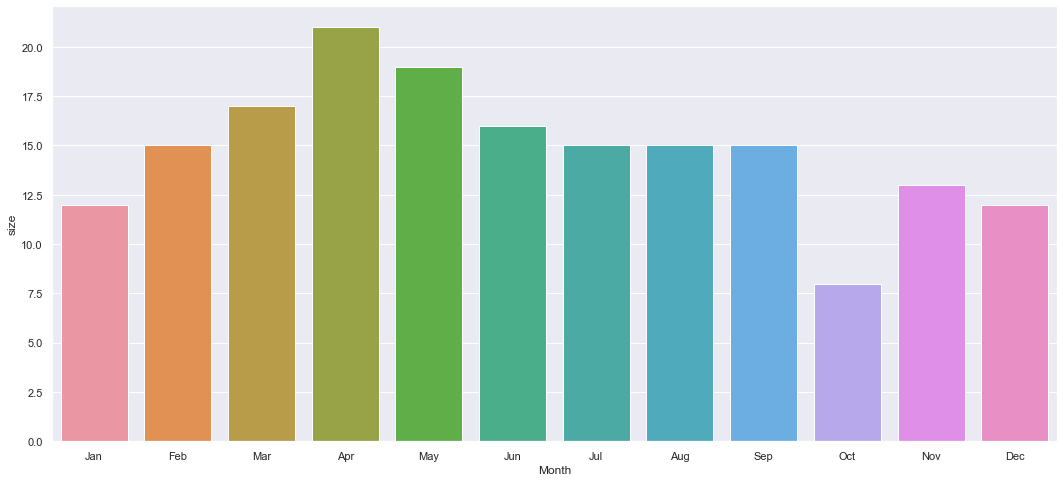

In [34]:
videos_per_month_comp = sns.barplot(x = 'Month', y = 'size', data = videos_per_month)